In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import STAGATE
import scanpy as sc

In [4]:
section_id = 'GSM5764424' 

In [8]:
file =''
adata = sc.read_visium(file, count_file=r'filtered_feature_bc_matrix.h5',load_images=True)
adata.var_names_make_unique()

In [10]:
adata 

AnnData object with n_obs × n_vars = 1248 × 32738
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [11]:
adata.obsm['spatial']

array([[11768, 14774],
       [11344,  3243],
       [10780, 13080],
       ...,
       [ 7228,  9020],
       [ 8601,  7547],
       [11371, 13192]], dtype=int64)

In [12]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score

------Calculating spatial graph...
The graph contains 0 edges, 1248 cells.
0.0000 neighbors per cell on average.


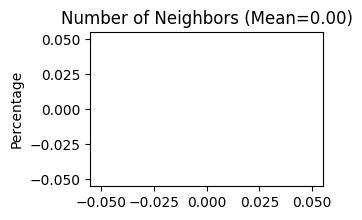

In [14]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [15]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1248, 3000)


100%|██████████| 500/500 [02:07<00:00,  3.93it/s]


In [16]:
r"C:\Users\KARAN\AppData\Local\R\win-library\4.3\spatialLIBD\data"

'C:\\Users\\KARAN\\AppData\\Local\\R\\win-library\\4.3\\spatialLIBD\\data'

In [17]:
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.3.0"
os.environ['R_USER'] = r"C:\Users\KARAN\anaconda3\envs\STAGATE_PT\Lib\site-packages\rpy2"


In [18]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=10)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [19]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


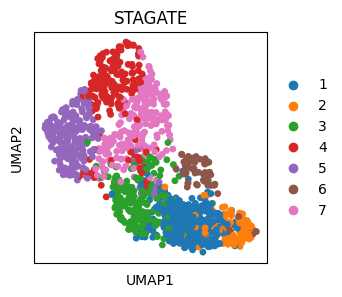

In [20]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

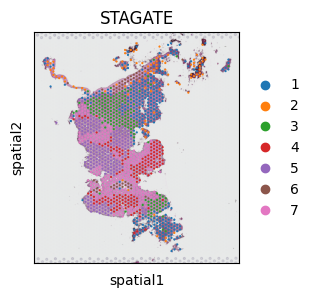

In [21]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])